In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt

In [2]:
from time import sleep

from ICARUS.Database.Database_2D import Database_2D
from ICARUS.Database import XFLRDB

# Load Database

In [4]:
db = Database_2D()
db.load_data()

from ICARUS.Input_Output.XFLR5.polars import read_polars_2d
read_polars_2d(db, XFLRDB)

airfoils = db.data

print(f"Airfoils that are computed are:")
for i , key in enumerate(list(airfoils.keys())):
    print(f"{i}: {key}")
sleep(1)
# index = int(input("Select an airfoil: "))
index = 6
airfoil: str = list(airfoils.keys())[index]

Airfoils that are computed are:
0: NACA0008
1: NACA0012
2: NACA0015
3: NACA1213
4: NACA2412
5: NACA4415
6: NACA5140
7: NACA64418
8: NACA64418_flapped


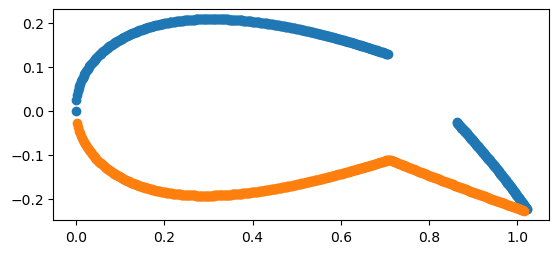

In [6]:
from ICARUS.Airfoils.airfoil import Airfoil

airf = Airfoil.naca('5140', n_points= 500)
airf.flap_airfoil(0.71, 1.4,40).plot(scatter=True)

# Airfoil Polars

In [7]:
from ICARUS.Visualization.airfoil.db_polars import plot_airfoil_polars

NACA 5140 polars are:


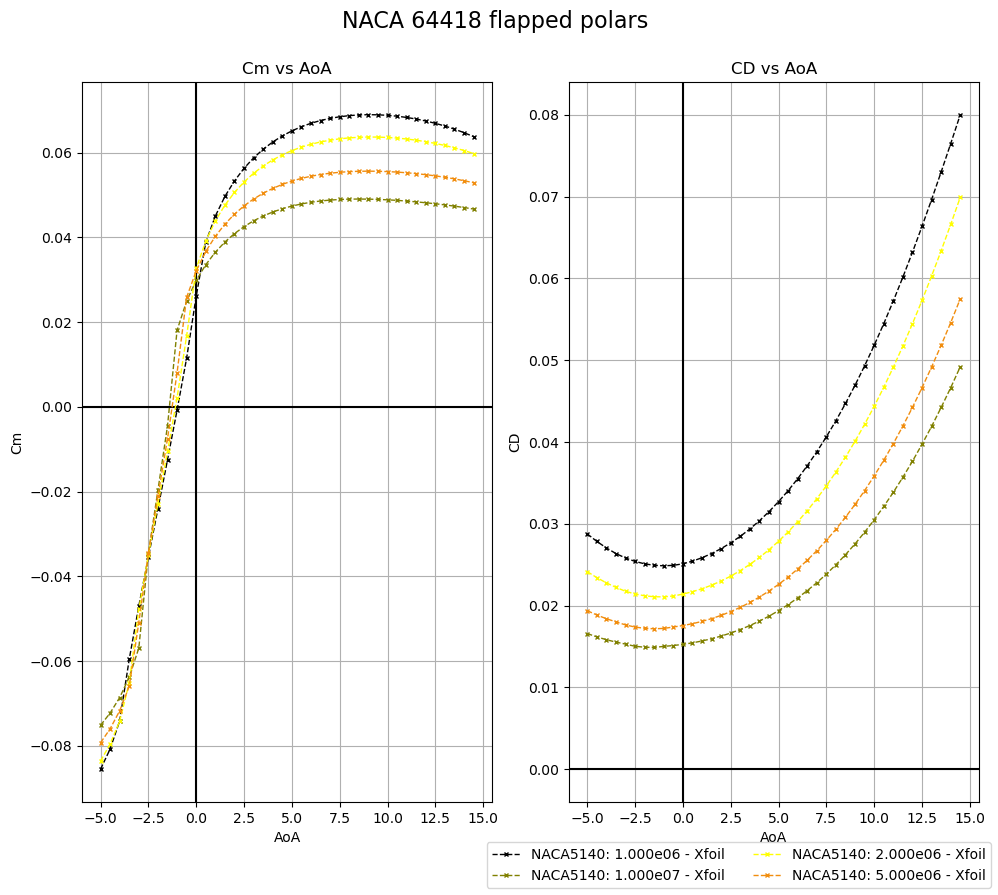

In [9]:
print(f"NACA {airfoil[4:]} polars are:")
axs, fig = plot_airfoil_polars(
    db.data,
    airfoil,
    ["All"],
    plots = [["AoA", "Cm"], ["AoA", "CD"]],
    size=(10,9),
    title= "NACA 64418 flapped polars"
)
# axs[0].axvline(x=1.1, color='b', linestyle='-')
# axs[0].axhline(y=1.52, color='b', linestyle='-')

# Select Reynolds number 

In [8]:
reynolds = db.get_airfoil_reynolds(airfoil)
if reynolds:
    print(f"For NACA {airfoil[4:]} these Reynolds were Computed:")
    print(*[f"{i}:\t{reyn}\n" for i,reyn in enumerate(reynolds)])
    index = int(input("Select Reynolds: "))
    reyn_to_plot = reynolds[index]
else:
    raise ValueError(f"Reynolds for {airfoil} were not computed")

For NACA 0008 these Reynolds were Computed:
0:	1.148e05
 1:	1.179e06
 2:	1.394e05
 3:	1.432e06
 4:	1.692e05
 5:	1.739e06
 6:	2.055e05
 7:	2.112e06
 8:	2.495e05
 9:	2.564e06
 10:	3.030e05
 11:	3.679e05
 12:	4.468e05
 13:	5.425e05
 14:	6.410e04
 15:	6.587e05
 16:	7.784e04
 17:	7.999e05
 18:	9.452e04
 19:	9.713e05
 20:	2.000e06



# Plot Reynolds

In [9]:
from ICARUS.Visualization.airfoil.db_reynolds import plot_airfoil_reynolds

For Reynolds= 1.739e06 polars are:
Run Doesn't Exist: NACA0008,1.739e06,'Xfoil'
Run Doesn't Exist: NACA0008,1.739e06,'OpenFoam'
Run Doesn't Exist: NACA0008,1.739e06,'1.739e06'


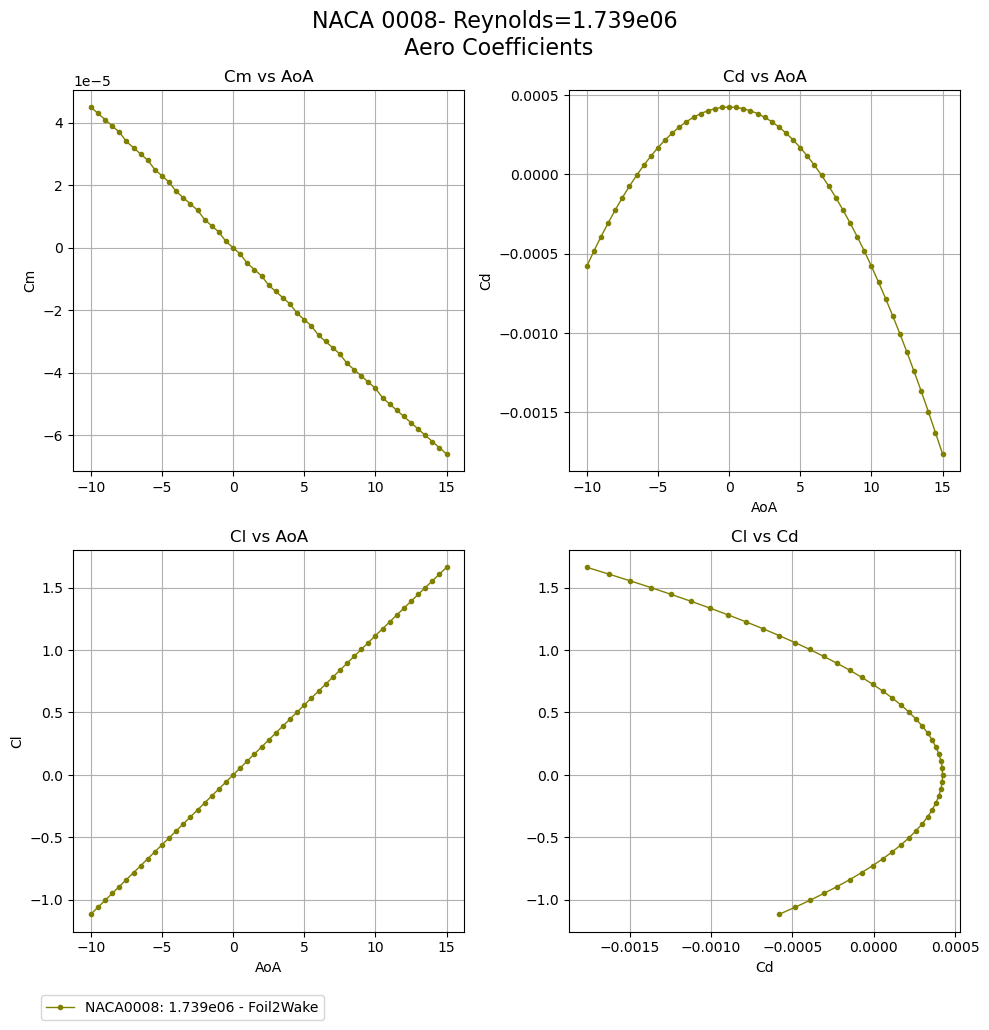

In [10]:
print(f"For Reynolds= {reyn_to_plot} polars are:")
plot_airfoil_reynolds(db.data,airfoil,reyn_to_plot,['All'],size=(10,10))